In [1]:
from GP_class import GaussianProcessRegressor
import jax.numpy as jnp
from jax import jacrev, lax, random, tree_map, vmap,jit
import gp

In [2]:
X = jnp.arange(-5, 5, 0.2).reshape(-1, 1)
X_train = jnp.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
X_train = jnp.arange(-5, 5, 0.4).reshape(-1, 1)
def f(x):
    return jnp.cos(x)
Y_train = vmap(f)(*X_train.T)
# default is non-noise:
gpr = GaussianProcessRegressor()
gpr.fit(X_train, Y_train)


In [3]:
num_steps = 40
lr = 0.01
gpr.optim(num_steps, lr, method='SGD')

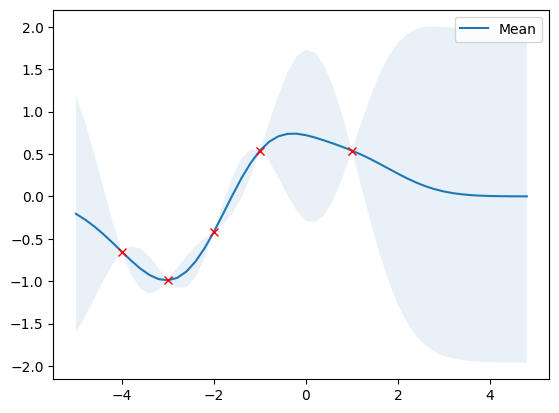

In [4]:
mu_s, cov_s = gpr.predict(X,return_cov=True)
gp.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

with noise:

In [2]:
gpr = GaussianProcessRegressor(sigma_y=0.2)
gpr.fit(X_train, Y_train)
num_steps = 40
lr = 0.01
gpr.optim(num_steps, lr, method='SGD')
mu_s, cov_s = gpr.predict(X,return_cov=True)
gp.plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

NameError: name 'X_train' is not defined